In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.api import VAR

## Первый шаг

In [3]:
#создаем словарь с данными, заранее собранными по данным ЦБ и Росстата
data = {
    "Год": [2019, 2019, 2019, 2019,
            2020, 2020, 2020, 2020,
            2021, 2021, 2021, 2021,
            2022, 2022, 2022, 2022,
            2023, 2023, 2023, 2023,
            2024, 2024, 2024],
    "Квартал": [1, 2, 3, 4,
                1, 2, 3, 4,
                1, 2, 3, 4,
                1, 2, 3, 4,
                1, 2, 3, 4,
                1, 2, 3],
    "SBP_vol (млрд руб)": [0.05, 15.72, 20, 30,
                            39.89, 71.6, 224.3, 459.3,
                            640, 1009.5, 1395, 2006,
                            2406, 3011, 3896, 5094,
                            5390, 6970, 8279, 10360,
                            10503.7, 15261.5, 19783.7],
    "M0 (млрд руб)": [9030, 9111, 9368, 9394,
                      9671, 11209, 11951, 12135,
                      12538, 12752, 12969, 12954,
                      13913, 13234, 13482, 14740,
                      15577, 16486, 17378, 16873,
                      16709, 16751, 16801],
    "M2 (млрд руб)": [46213, 46735, 47584, 49195,
                      51314, 53068, 55294, 56123,
                      58178, 59194, 59817, 62313,
                      66660, 68993, 73333, 76873,
                      83956, 86197, 90111, 92547,
                      99422, 102519, 106243],
    "M0/M2": [0.1954, 0.1950, 0.1969, 0.1910,
              0.1885, 0.2112, 0.2161, 0.2162,
              0.2155, 0.2154, 0.2168, 0.2079,
              0.2087, 0.1918, 0.1838, 0.1917,
              0.1855, 0.1913, 0.1929, 0.1823,
              0.1681, 0.1634, 0.1581],
    "Key Rate (%)": [7.75, 7.5, 7, 6.25,
                     6, 4.5, 4.25, 4.25,
                     4.5, 5.5, 6.75, 8.5,
                     20, 9.5, 7.5, 7.5,
                     7.5, 7.5, 13, 15,
                     16, 16, 19],
    "GDP (млрд руб)": [24608.6, 26628.6, 28346.0, 30025.1,
                        24866.0, 23775.4, 27786.3, 31230.5,
                        28078.9, 32025.7, 35488.0, 40181.1,
                        36901.8, 36993.1, 38761.7, 42532.3,
                        36176.0, 40070.2, 45087.7, 50814.4,
                        43240.0, 46269.3, 49591.1],
    "Inflation (ИПЦ)": [100.32, 100.04, 99.84, 100.36,
                         100.55, 100.22, 99.93, 100.83,
                         100.66, 100.69, 100.60, 100.82,
                         107.61, 99.65, 100.05, 100.78,
                         100.37, 100.37, 100.87, 100.73,
                         100.39, 100.64, 100.48],
    "SBP_ops (млн ед.)": [0.1, 1, 2, 4,
                           5, 8, 30, 67,
                           105, 171, 236, 356,
                           436, 648, 844, 1121,
                           1245, 1648, 1903, 2355,
                           2516.9, 3164.3, 3571.6]
}

In [4]:
df = pd.DataFrame(data)
df

,Год,Квартал,SBP_vol (млрд руб),M0 (млрд руб),M2 (млрд руб),M0/M2,Key Rate (%),GDP (млрд руб),Inflation (ИПЦ),SBP_ops (млн ед.)
0,2019,1,0.05,9030,46213,0.1954,7.75,24608.6,100.32,0.1
1,2019,2,15.72,9111,46735,0.1950,7.50,26628.6,100.04,1.0
2,2019,3,20.00,9368,47584,0.1969,7.00,28346.0,99.84,2.0
3,2019,4,30.00,9394,49195,0.1910,6.25,30025.1,100.36,4.0
4,2020,1,39.89,9671,51314,0.1885,6.00,24866.0,100.55,5.0
5,2020,2,71.60,11209,53068,0.2112,4.50,23775.4,100.22,8.0
6,2020,3,224.30,11951,55294,0.2161,4.25,27786.3,99.93,30.0
7,2020,4,459.30,12135,56123,0.2162,4.25,31230.5,100.83,67.0
8,2021,1,640.00,12538,58178,0.2155,4.50,28078.9,100.66,105.0
9,2021,2,1009.50,12752,59194,0.2154,5.50,32025.7,100.69,171.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Год                 23 non-null     int64  
 1   Квартал             23 non-null     int64  
 2   SBP_vol (млрд руб)  23 non-null     float64
 3   M0 (млрд руб)       23 non-null     int64  
 4   M2 (млрд руб)       23 non-null     int64  
 5   M0/M2               23 non-null     float64
 6   Key Rate (%)        23 non-null     float64
 7   GDP (млрд руб)      23 non-null     float64
 8   Inflation (ИПЦ)     23 non-null     float64
 9   SBP_ops (млн ед.)   23 non-null     float64
dtypes: float64(6), int64(4)
memory usage: 1.9 KB


## Второй шаг

In [7]:
df.describe()

,Год,Квартал,SBP_vol (млрд руб),M0 (млрд руб),M2 (млрд руб),M0/M2,Key Rate (%),GDP (млрд руб),Inflation (ИПЦ),SBP_ops (млн ед.)
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2021.391304,2.434783,4211.576522,13262.000000,69212.260870,0.194935,9.184783,35629.469565,100.730435,888.604348
std,1.698639,1.121123,5409.719991,2790.408181,19269.957089,0.017036,4.800697,8207.415591,1.537085,1111.576212
min,2019.000000,1.000000,0.050000,9030.000000,46213.000000,0.158100,4.250000,23775.400000,99.650000,0.100000
25%,2020.000000,1.500000,147.950000,11580.000000,54181.000000,0.187000,6.125000,28212.450000,100.270000,19.000000
50%,2021.000000,2.000000,2006.000000,12969.000000,62313.000000,0.192900,7.500000,36176.000000,100.480000,356.000000
75%,2023.000000,3.000000,6180.000000,16031.500000,85076.500000,0.209950,11.250000,41356.700000,100.710000,1446.500000
max,2024.000000,4.000000,19783.700000,17378.000000,106243.000000,0.216800,20.000000,50814.400000,107.610000,3571.600000


In [8]:
#корреляционная матрица для выбранных переменных
vars_for_corr = ["SBP_vol (млрд руб)", "SBP_ops (млн ед.)", "M0/M2", "Key Rate (%)", "GDP (млрд руб)", "Inflation (ИПЦ)"]
corr_matrix = df[vars_for_corr].corr()
corr_matrix

,SBP_vol (млрд руб),SBP_ops (млн ед.),M0/M2,Key Rate (%),GDP (млрд руб),Inflation (ИПЦ)
SBP_vol (млрд руб),1.000000,0.990095,-0.811987,0.765078,0.857428,-0.014319
SBP_ops (млн ед.),0.990095,1.000000,-0.820257,0.757878,0.875485,-0.028586
M0/M2,-0.811987,-0.820257,1.000000,-0.633018,-0.612666,0.181721
Key Rate (%),0.765078,0.757878,-0.633018,1.000000,0.731550,0.513865
GDP (млрд руб),0.857428,0.875485,-0.612666,0.731550,1.000000,0.115993
Inflation (ИПЦ),-0.014319,-0.028586,0.181721,0.513865,0.115993,1.000000


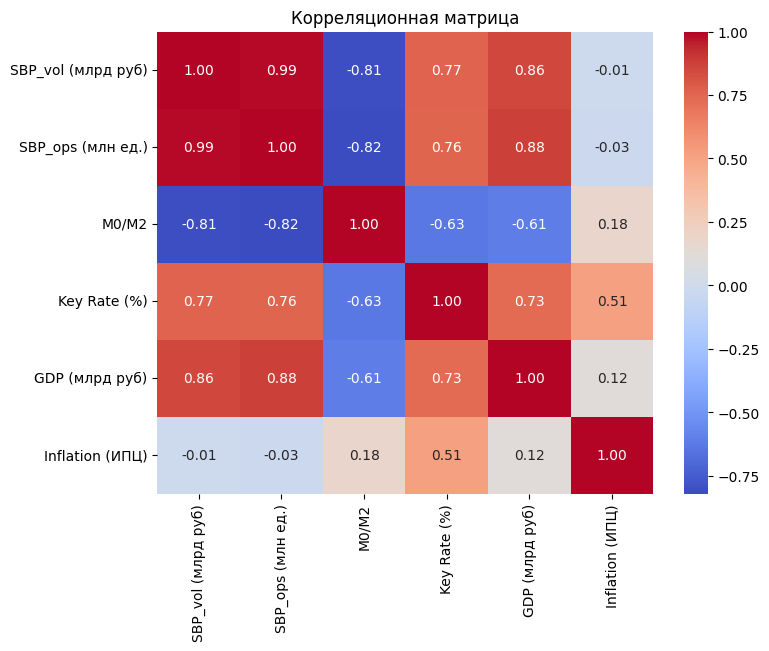

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

В ходе исследования была составлена корреляционная матрица по шести ключевым переменным (объём операций в СБП, количество операций в СБП, доля наличных в денежной массе M0/M2, ключевая ставка, ВВП и индекс потребительских цен), чтобы определить силу и направление взаимосвязей между ними. Результаты показывают, что объём и количество операций в СБП находятся в почти идеальной положительной зависимости (коэффициент 0.99), что означает параллельный рост в абсолютном и количественном выражениях. Эти же переменные сильно отрицательно коррелируют с M0/M2 (около –0.81 и –0.82), указывая, что усиление цифровых платежей сопровождается снижением доли наличных в структуре денежной массы. Наблюдается также высокая положительная связь (примерно 0.86 и 0.88) между показателями СБП и ВВП, что может указывать на взаимное влияние растущей экономики и расширяющегося сектора безналичных расчётов. Сходную положительную взаимосвязь (0.76) обнаруживает ключевая ставка и показатели СБП, отражая, что периоды более активной денежно-кредитной политики ЦБ (повышение или колебания ставки) совпадают с ростом цифровых платежей. Корреляция между ключевой ставкой и ВВП равна 0.73, что даёт основание полагать, что ужесточение или смягчение монетарных условий может сопровождать изменения в темпах экономического роста. Индекс потребительских цен коррелирует со всеми переменными в меньшей степени и лишь умеренно связан с ключевой ставкой (0.51), что свидетельствует о более сложной и многокомпонентной природе формирования инфляции, которая не определяется напрямую только цифровизацией платёжной системы или динамикой ВВП.

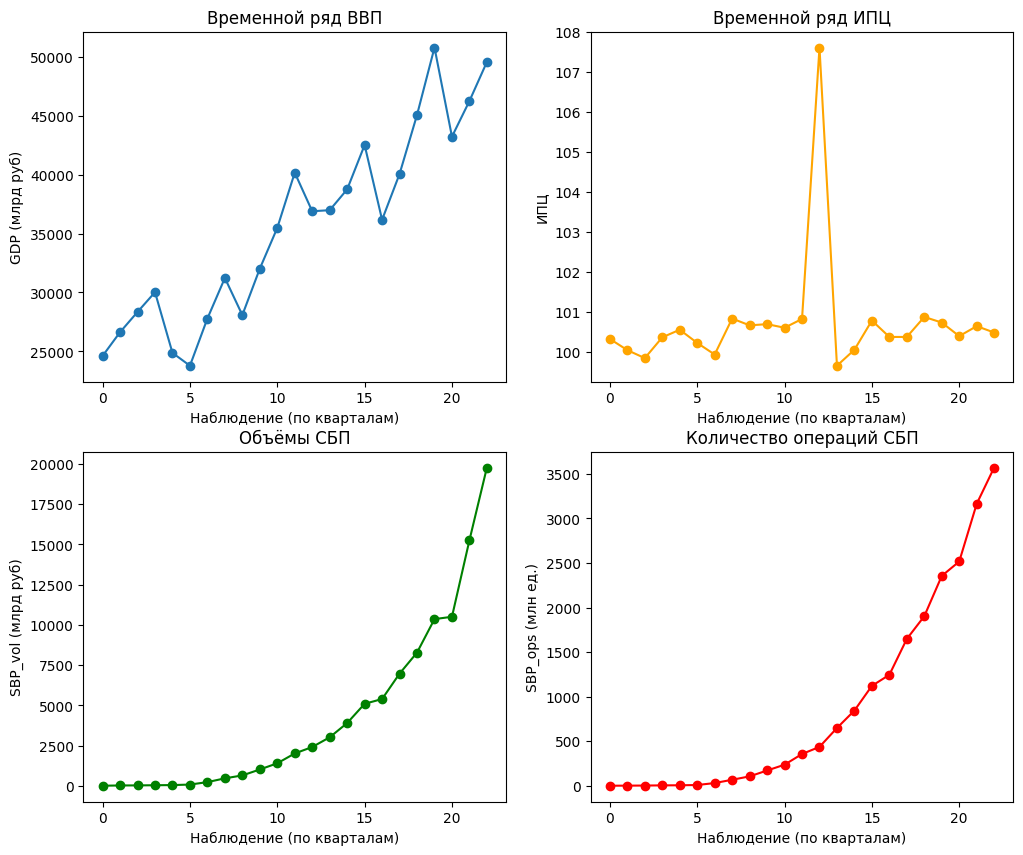

In [11]:
#графики временных рядов по ключевым переменным
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(df["GDP (млрд руб)"], marker='o')
plt.title("Временной ряд ВВП")
plt.xlabel("Наблюдение (по кварталам)")
plt.ylabel("GDP (млрд руб)")

plt.subplot(2, 2, 2)
plt.plot(df["Inflation (ИПЦ)"], marker='o', color='orange')
plt.title("Временной ряд ИПЦ")
plt.xlabel("Наблюдение (по кварталам)")
plt.ylabel("ИПЦ")

plt.subplot(2, 2, 3)
plt.plot(df["SBP_vol (млрд руб)"], marker='o', color='green')
plt.title("Объёмы СБП")
plt.xlabel("Наблюдение (по кварталам)")
plt.ylabel("SBP_vol (млрд руб)")

plt.subplot(2, 2, 4)
plt.plot(df["SBP_ops (млн ед.)"], marker='o', color='red')
plt.title("Количество операций СБП")
plt.xlabel("Наблюдение (по кварталам)")
plt.ylabel("SBP_ops (млн ед.)")

plt.show()

Просто посмотреть, понимать для визуализации

## Третий шаг

In [14]:
#логарифм объёмов СБП (если значение 0 встречается, оно заменяется на NaN)
df["ln_SBP_vol"] = np.log(df["SBP_vol (млрд руб)"].replace(0, np.nan))

#логарифм количества операций СБП (аналогично, 0 заменяются на NaN)
df["ln_SBP_ops"] = np.log(df["SBP_ops (млн ед.)"].replace(0, np.nan))

#логарифм ВВП
df["ln_GDP"] = np.log(df["GDP (млрд руб)"])

#логарифм инфляции (ИПЦ)
df["ln_Inflation"] = np.log(df["Inflation (ИПЦ)"])

#логарифм отношения М0/M2 (структура денежной массы)
df["ln_M0_M2"] = np.log(df["M0/M2"])

#создание лагированной переменной для ln_GDP (лаг на один квартал)
df["ln_GDP_lag1"] = df["ln_GDP"].shift(1)

In [15]:
cols_to_show = ["ln_SBP_vol", "ln_SBP_ops", "ln_GDP", "ln_Inflation", "ln_M0_M2", "ln_GDP_lag1"]
df[cols_to_show].head()

,ln_SBP_vol,ln_SBP_ops,ln_GDP,ln_Inflation,ln_M0_M2,ln_GDP_lag1
0,-2.995732,-2.302585,10.110851,4.608365,-1.632707,NaN
1,2.754934,0.000000,10.189741,4.605570,-1.634756,10.110851
2,2.995732,0.693147,10.252241,4.603569,-1.625059,10.189741
3,3.401197,1.386294,10.309789,4.608764,-1.655482,10.252241
4,3.686126,1.609438,10.121257,4.610655,-1.668657,10.309789


Был выполнен логарифм ключевых переменных (объёмов и количества операций СБП, ВВП, отношения M0/M2 и индекса потребительских цен) для преобразования исходных уровневых значений в форму, более удобную для линейных регрессионных моделей и потенциального устранения асимметрии в данных. Такой приём позволяет интерпретировать коэффициенты как эластичности и сглаживает резкие скачки в исходных временных рядах. Лаговая переменная по ВВП (`ln_GDP_lag1`) добавлена, чтобы учесть динамическую природу экономических процессов и частично уменьшить проблему эндогенности (когда текущее значение ВВП может зависеть от собственных прошедших значений).
Ключевая ставка (Key Rate (%)) остается без изменений, что позволяет напрямую анализировать, как изменения в процентных пунктах ключевой ставки влияют на ВВП или инфляцию. Это соответствует экономической логике, поскольку ключевая ставка – это показатель монетарной политики, и её эффект нужно оценивать в абсолютных величинах, а не в процентном изменении.

## Четвертый шаг

In [18]:
#формируем набор объясняющих переменных для модели ln(GDP)
X_gdp = df[["ln_SBP_vol", "ln_SBP_ops", "ln_M0_M2", "Key Rate (%)"]].dropna()
y_gdp = df.loc[X_gdp.index, "ln_GDP"]

#добавляем константу для модели (Intercept)
X_gdp = sm.add_constant(X_gdp)

#оцениваем модель методом наименьших квадратов (OLS)
model_gdp = sm.OLS(y_gdp, X_gdp).fit()

In [19]:
model_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_GDP   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     35.72
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           2.47e-08
Time:                        20:40:53   Log-Likelihood:                 26.565
No. Observations:                  23   AIC:                            -43.13
Df Residuals:                      18   BIC:                            -37.45
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.5260      0.422     22.552      0.000       8.639      10.413
ln_SBP_vol      -0.0300      0.031     -0.973      0.344      -0.095       0.035
ln_SBP_ops       0.0863      0.033      2.636      0.017       0.018       0.155
ln_M0_M2        -0.3718      0.270     -1.379      0.185      -0.938       0.195
Key Rate (%)     0.0104      0.006      1.879      0.077      -0.001       0.022
==============================================================================
Omnibus:                        2.564   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                1.192
Skew:                          -0.018   Prob(JB):                        0.551
Kurtosis:                       1.885   Cond. No.                         378.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

После логарифмирования переменных, снижения рисков несоразмерности данных и первичного корреляционного анализа был построен регрессионный уравнением методом наименьших квадратов с зависимой переменной ln(GDP) и объясняющими переменными ln_SBP_vol, ln_SBP_ops, ln_M0_M2 и Key Rate (%). Модель показала довольно высокое качество подгонки (R-squared = 0.888, скорректированный R-squared = 0.863), указывая, что большая часть вариации логарифма ВВП объясняется включёнными факторами. При этом коэффициент при ln_SBP_ops (0.0863) статистически значим (p-value = 0.017) и положителен, что может отражать связь расширения безналичных операций по СБП с ростом объёмов экономики. Коэффициент при ln_SBP_vol оказался отрицательным (–0.0300) и статистически незначимым (p-value = 0.344), что нередко встречается в случае сильной коллинеарности с числом транзакций. Переменная ln_M0_M2, имеющая коэффициент –0.3718, не достигает статистической значимости (p-value = 0.185), но знак говорит о возможном отрицательном эффекте большей доли наличных на уровень ВВП. Ключевая ставка (0.0104) с p-value = 0.077 граничит с уровнем 10% значимости, намекая, что в периодах, когда политика ЦБ более жёсткая, ВВП может изменяться в соответствии с монетарными условиями, хотя результат нельзя считать однозначно доказанным в рамках данной модели.

### Четвертый шаг (другая модель)

In [22]:
#формируем набор объясняющих переменных для модели ln(Inflation)
X_inf = df[["ln_SBP_vol", "ln_SBP_ops", "ln_M0_M2", "Key Rate (%)"]].dropna()
y_inf = df.loc[X_inf.index, "ln_Inflation"]

#добавляем константу
X_inf = sm.add_constant(X_inf)

#оцениваем модель методом OLS
model_inf = sm.OLS(y_inf, X_inf).fit()

In [23]:
model_inf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ln_Inflation   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     11.25
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           9.40e-05
Time:                        20:40:53   Log-Likelihood:                 79.171
No. Observations:                  23   AIC:                            -148.3
Df Residuals:                      18   BIC:                            -142.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.8141      0.043    112.226      0.000       4.724       4.904
ln_SBP_vol       0.0006      0.003      0.177      0.862      -0.006       0.007
ln_SBP_ops      -0.0010      0.003     -0.314      0.757      -0.008       0.006
ln_M0_M2         0.1417      0.027      5.173      0.000       0.084       0.199
Key Rate (%)     0.0035      0.001      6.206      0.000       0.002       0.005
==============================================================================
Omnibus:                        2.386   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.997
Skew:                           0.682   Prob(JB):                        0.368
Kurtosis:                       2.529   Cond. No.                         378.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

После построения аналогичной регрессии для ln_Inflation с теми же объясняющими переменными (ln_SBP_vol, ln_SBP_ops, ln_M0_M2 и ключевая ставка) оказалось, что модель объясняет около 71.4% вариации логарифма инфляции (R-squared = 0.714, скорректированное значение 0.651) и является статистически значимой (p-value F-теста = 9.40e-05). Коэффициенты при показателях СБП близки к нулю и не достигают статистической значимости (p-value: ~0.86 и ~0.76), что указывает на отсутствие прямой зависимости между цифровыми платежами и инфляционным давлением. Зато ключевая ставка (0.0035) является положительной и высокозначимой (p-value = 0.000), показывая, что более высокая ставка может сопровождаться ростом инфляции в модели, хотя это скорее отражение реакции ЦБ на инфляционные ожидания и фактический рост цен. Значимым (p-value = 0.000) и положительным (0.1417) оказался коэффициент при ln_M0_M2, отчасти подтверждая гипотезу, что при большей доле наличной массы инфляционные процессы могут усиливаться.

Исходя из простроенных моделей видно, что значительная часть параметров незначима. Возможные причины незначимости некоторых коэффициентов:
1.	Мультиколлинеарность. Показатели ln_SBP_vol и ln_SBP_ops почти линейно связаны, что видно из корреляционной матрицы на предыдущем шаге. Высокая корреляция между ними может приводить к завышенным стандартным ошибкам, вследствие чего отдельные коэффициенты становятся статистически незначимыми.
2.	Небольшой объём выборки. Всего 23 наблюдения (поквартальные данные за 2019–2024 гг.) – это ограниченный набор для регрессионного анализа, что снижает статистическую мощность тестов и затрудняет обнаружение значимых эффектов.
3.	Возможная спецификация модели. Возможно, что включение сразу двух очень похожих показателей цифровизации (ln_SBP_vol и ln_SBP_ops) не даёт дополнительной информации, а наоборот, вносит шум.

## Пятый шаг

Проверка мультиколлинеарности

In [28]:
#используем X_gdp без константы для расчёта VIF
X = X_gdp.drop('const', axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,ln_SBP_vol,145.550540
1,ln_SBP_ops,101.759037
2,ln_M0_M2,16.496909
3,Key Rate (%),7.870790


Исходя из полученных результатов VIF, видно, что два показателя цифровизации – ln_SBP_vol (VIF ≈ 145.6) и ln_SBP_ops (VIF ≈ 101.8) – демонстрируют очень высокую мультиколлинеарность. Это означает, что они практически передают одну и ту же информацию, и включение их обоих в модель создаёт завышенные стандартные ошибки, что может приводить к незначимости коэффициентов (как мы видим в модели ln(GDP), где ln_SBP_vol незначим, а ln_SBP_ops – значим). В вашем случае ln_SBP_ops оказался значимым в модели ln(GDP), поэтому имеет смысл оставить именно его

Пробуем без одного из показателей

In [31]:
#формируем новую матрицу X без ln_SBP_vol
X_gdp_improved = df[["ln_SBP_ops", "ln_M0_M2", "Key Rate (%)"]].dropna()
y_gdp_improved = df.loc[X_gdp_improved.index, "ln_GDP"]

#добавляем константу
X_gdp_improved = sm.add_constant(X_gdp_improved)

#оцениваем улучшенную модель OLS
model_gdp_improved = sm.OLS(y_gdp_improved, X_gdp_improved).fit()

In [32]:
model_gdp_improved.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_GDP   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     47.44
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           5.11e-09
Time:                        20:40:53   Log-Likelihood:                 25.976
No. Observations:                  23   AIC:                            -43.95
Df Residuals:                      19   BIC:                            -39.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.4317      0.411     22.974      0.000       8.572      10.291
ln_SBP_ops       0.0553      0.007      7.560      0.000       0.040       0.071
ln_M0_M2        -0.3979      0.268     -1.485      0.154      -0.959       0.163
Key Rate (%)     0.0110      0.005      2.020      0.058      -0.000       0.022
==============================================================================
Omnibus:                        1.791   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.039
Skew:                          -0.110   Prob(JB):                        0.595
Kurtosis:                       1.982   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#используем новую матрицу X_gdp_improved без константы для расчёта VIF
X_improved = X_gdp_improved.drop('const', axis=1)
vif_data_improved = pd.DataFrame()
vif_data_improved["feature"] = X_improved.columns
vif_data_improved["VIF"] = [variance_inflation_factor(X_improved.values, i) for i in range(len(X_improved.columns))]
vif_data_improved

,feature,VIF
0,ln_SBP_ops,5.372142
1,ln_M0_M2,6.160520
2,Key Rate (%),7.303825


VIF для ln_SBP_ops, ln_M0_M2 и Key Rate (%) оказался значительно ниже (обычно VIF < 10 считается приемлемым, хотя иногда допускают до 5–10), что свидетельствует о снижении мультиколлинеарности и улучшении модели

После уменьшения мультиколлинеарности путём исключения одной из двух близких по смыслу переменных (объёма СБП), была построена упрощённая регрессионная модель, в которой зависимой переменной выступает ln(GDP), а в качестве факторов используются ln_SBP_ops, ln_M0_M2 и ключевая ставка (при добавлении константы). Выборка невелика (всего 23 наблюдения за поквартальный период 2019–2024 гг.), поэтому некоторые коэффициенты сохраняют высокие p-значения и формально не достигают классических уровней статистической значимости.

Результаты показывают, что модель объясняет примерно 88,2% разброса ln(GDP), а скорректированный показатель (R-squared) равен 86,4%. Коэффициент при ln_SBP_ops (0.0553) остаётся существенно положительным и статистически значимым (p < 0.001). Это может отражать, что повышение цифровизации платёжного оборота (в виде увеличения числа операций в СБП) связано с ростом экономики в среднесрочном периоде. Переменная ln_M0_M2 (–0.3979) отрицательна, но статистически незначима (p = 0.154), что может говорить о тенденции снижения ВВП при росте доли наличности, хотя в имеющейся короткой выборке это подтверждается лишь частично. Ключевая ставка (0.0110) даёт положительный коэффициент с p-значением близким к 0.05 (0.058), что в конкретном историческом отрезке может означать, что периоды более высокой ставки совпадали либо с фазами относительного экономического подъёма, либо отражали политику ЦБ, направленную на сдерживание инфляционных рисков в условиях уже растущего ВВП.

Малое число наблюдений объясняет повышенную чувствительность к добавлению или удалению переменных и отсутствие значимости по некоторым факторам. Со временем, когда будет накоплен более обширный ряд квартальных данных, оценка параметров станет более точной и результаты — более надёжными. Перейти на ежемесячные данные для улучшения статистической мощности не представляется возможным, поскольку открытые источники ЦБ не содержат в полном объёме ежемесячную статистику по интересующим показателям СБП (особенно по количеству операций), что вынуждает ограничиваться квартальной детализацией.

Проверка мультиколлинеарности

In [37]:
#используем X_inf без константы для расчёта VIF
X = X_inf.drop('const', axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,ln_SBP_vol,145.550540
1,ln_SBP_ops,101.759037
2,ln_M0_M2,16.496909
3,Key Rate (%),7.870790


In [38]:
#формируем набор объясняющих переменных для модели ln(Inflation)
X_inf_improved = df[["ln_SBP_ops", "ln_M0_M2", "Key Rate (%)"]].dropna()
y_inf_improved = df.loc[X_inf_improved.index, "ln_Inflation"]

#добавляем константу
X_inf_improved = sm.add_constant(X_inf_improved)

#оцениваем модель методом OLS
model_inf = sm.OLS(y_inf_improved, X_inf_improved).fit()

In [39]:
model_inf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ln_Inflation   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     15.80
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           2.14e-05
Time:                        20:40:53   Log-Likelihood:                 79.151
No. Observations:                  23   AIC:                            -150.3
Df Residuals:                      19   BIC:                            -145.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.8158      0.041    118.405      0.000       4.731       4.901
ln_SBP_ops      -0.0005      0.001     -0.652      0.522      -0.002       0.001
ln_M0_M2         0.1422      0.027      5.354      0.000       0.087       0.198
Key Rate (%)     0.0035      0.001      6.399      0.000       0.002       0.005
==============================================================================
Omnibus:                        2.434   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.014
Skew:                           0.691   Prob(JB):                        0.365
Kurtosis:                       2.565   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#используем X_inf без константы для расчёта VIF
X_improved = X_inf_improved.drop('const', axis=1)
vif_data_improved = pd.DataFrame()
vif_data_improved["feature"] = X_improved.columns
vif_data_improved["VIF"] = [variance_inflation_factor(X_improved.values, i) for i in range(len(X_improved.columns))]
vif_data_improved

,feature,VIF
0,ln_SBP_ops,5.372142
1,ln_M0_M2,6.160520
2,Key Rate (%),7.303825


По аналогии после построения регрессии для ln(Inflation) с объясняющими переменными ln_SBP_ops, ln_M0_M2 и ключевой ставкой видно, что модель объясняет около 71,4% разброса логарифма инфляции, причём F-статистика (15.80) и её p-value (2.14e-05) подтверждают общую значимость. 
Коэффициент при ln_SBP_ops близок к нулю и незначим (p-value ≈ 0.52), что означает отсутствие явного влияния интенсивности цифровых платежей на уровень инфляции в рамках имеющегося набора данных. 
ln_M0_M2 (0.1422) и ключевая ставка (0.0035) оказываются положительными и статистически значимыми (p-value = 0.000), что может отражать, что при более высокой доле наличной массы инфляционные процессы имеют тенденцию к усилению, а ключевая ставка возрастает в периоды повышенного инфляционного давления или при ожиданиях роста цен. 
Величины VIF (около 5.37–7.30) показывают, что мультиколлинеарность остаётся в умеренных пределах и не должна критически искажать оценки. Следует учесть, что выборка ограничена (23 квартала), поэтому в дальнейшем, по мере накопления более продолжительного ряда данных, результаты могут измениться

## Шестой шаг

Далее перейдём к следующему этапу нашего исследования – построению VAR-модели для анализа динамических взаимосвязей между основными переменными. В VAR-модели мы одновременно моделируем несколько временных рядов, что позволяет оценить, как шок в одной переменной (например, в активности цифровых операций) влияет на другие переменные (такие как ВВП, инфляция, структура денежной массы и ключевая ставка) в динамике

In [44]:
#подготовка данных для VAR-модели: выбираем нужные переменные и удаляем строки с пропусками
var_data = df[["ln_SBP_ops", "ln_M0_M2", "ln_GDP", "ln_Inflation", "Key Rate (%)"]].dropna()
var_data.head()

,ln_SBP_ops,ln_M0_M2,ln_GDP,ln_Inflation,Key Rate (%)
0,-2.302585,-1.632707,10.110851,4.608365,7.75
1,0.000000,-1.634756,10.189741,4.605570,7.50
2,0.693147,-1.625059,10.252241,4.603569,7.00
3,1.386294,-1.655482,10.309789,4.608764,6.25
4,1.609438,-1.668657,10.121257,4.610655,6.00


Для корректного построения VAR-модели необходимо выбрать оптимальное количество лагов (задержек), используя информационные критерии (например, AIC, BIC)

In [46]:
#инициализируем VAR-модель на наших данных
var_model = VAR(var_data)

#определяем оптимальное количество лагов (до 2-х кварталов, например)
lag_order_results = var_model.select_order(maxlags=2)
lag_order_results.summary()

,AIC,BIC,FPE,HQIC
0,-15.39,-15.14,2.075e-07,-15.33
1,-22.76,-21.27*,1.410e-10,-22.44
2,-23.56*,-20.82,1.049e-10*,-22.96*


Выбор оптимального количества лагов позволяет учитывать, сколько кварталов требуется, чтобы шок в одной переменной оказал влияние на другие. Например, оптимальным оказался лаг 2, то эффекты изменений проявляются через один квартал

Оцениваем VAR-модель

In [49]:
optimal_lag = 2
var_results = var_model.fit(optimal_lag)
print("Результаты VAR-модели:")
var_results.summary()

Результаты VAR-модели:


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 11, Feb, 2025
Time:                     20:40:54
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -20.8196
Nobs:                     21.0000    HQIC:                  -22.9616
Log likelihood:           153.342    FPE:                1.04940e-10
AIC:                     -23.5553    Det(Omega_mle):     1.27728e-11
--------------------------------------------------------------------
Results for equation ln_SBP_ops
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                 122.312974        27.520392            4.444           0.000
L1.ln_SBP_ops           1.077752         0.086070           12.522           0.000
L1.ln_M0_M2             7.016360         1.4194

В рамках исследования была проведена VAR-анализ, чтобы учесть взаимозависимость всех ключевых переменных (логарифм числа операций в СБП, логарифм отношения наличных к широкой денежной массе M0/M2, логарифм ВВП, логарифм инфляции и ключевая ставка). В отличие от отдельных регрессионных моделей, где одна переменная рассматривается как зависимая, а остальные – только как факторы, в VAR-модели каждая переменная моделируется на основе своих собственных лагов и лагов остальных переменных. Это помогает выявлять динамические эффекты, когда, например, изменение цифровизации (СБП) может влиять на ВВП и инфляцию не сразу, а с некоторой задержкой, и в то же время ВВП и инфляция могут обратно влиять на развитие СБП.

Оптимальный порядок лагов по критериям AIC, BIC и FPE оказался равен двум, поэтому в модель включили лаги за один квартал и за два квартала. Результаты в уравнении ln_SBP_ops показывают, что величины ln_SBP_ops, ln_M0_M2, ln_GDP и ln_Inflation на первом и втором лагах могут оказывать статистически значимое воздействие на динамику безналичных операций. Так, при L1.ln_SBP_ops (коэффициент 1.0778, p-value ~ 0.000) наблюдается эффект самовозрастания: высокая активность СБП в предыдущем квартале коррелирует с ещё большим числом операций в текущем. Параметры при L1.ln_M0_M2 (7.0164) и L1.ln_GDP (–1.8973) оказались существенны, что может означать, что рост доли наличности несколько подавляет последующую цифровизацию, а более высокое значение ВВП в предшествующем квартале положительно влияет на экономическую активность в целом, но в данном уравнении коэффициент имеет отрицательный знак, указывая, что при условии одновременного роста безналичных транзакций и широкой денежной массы высокая база ВВП предыдущего квартала может приводить к определённой коррекции темпов прироста операций СБП. Положительный коэффициент при L1.Key Rate (%) (0.0369) с p-value около 0.06 говорит о том, что более высокая ставка в предыдущем периоде может сопровождаться некоторым ростом операций СБП, но результат не вполне однозначен. 

В уравнении ln_GDP большая часть коэффициентов не достигает строгой статистической значимости, однако можно отметить влияние L1.ln_Inflation (–7.3562, p-value = 0.023) и L1.Key Rate (%) (0.0424, p-value = 0.016). Отрицательный знак при лаговой инфляции говорит о том, что более высокий уровень цен в предыдущем квартале может со временем угнетать экономический рост (при прочих равных условиях), в то время как положительный коэффициент при ключевой ставке может указывать на то, что в исследованном периоде повышенная ставка совпадала с более высокими темпами роста экономики, либо отражала реакцию ЦБ на экономический подъём (хотя при малом числе наблюдений эти эффекты могут быть специфичны для конкретного исторического отрезка). 

В уравнениях ln_Inflation и Key Rate (%) статистическая значимость коэффициентов, как правило, ниже, отражая, что формирование инфляции и динамика ключевой ставки зависят от широкого набора факторов и, вероятно, не столь прямо определяются текущей цифровизацией платёжных услуг или ВВП в условиях короткого ряда данных. Заметная корреляция остатков ln_Inflation и Key Rate (%) (~0.905) соответствует известному факту, что ЦБ регулирует ставку в зависимости от инфляционных процессов, в результате чего обе переменные двигаются в одном направлении или реагируют друг на друга с определённым лагом.

Таким образом, VAR-анализ помогает увидеть сложные обратные связи между цифровизацией платежей, структурой денежной массы, экономическим ростом и монетарными условиями. В настоящем исследовании выборка невелика (21 наблюдение после учёта лагов), поэтому многие коэффициенты не показывают статистической значимости или дают противоречивые знаки. По мере накопления более длинного ряда квартальных данных у исследователей будет возможность получать более надёжные и интерпретируемые результаты, включая оценку импульсных откликов и построение прогнозов на базе VAR-модели.

### Анализ импульсных откликов (Impulse Response Functions)

Импульсные отклики показывают, как шок (удар) в одной переменной распространяется на остальные переменные модели в течение нескольких кварталов

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


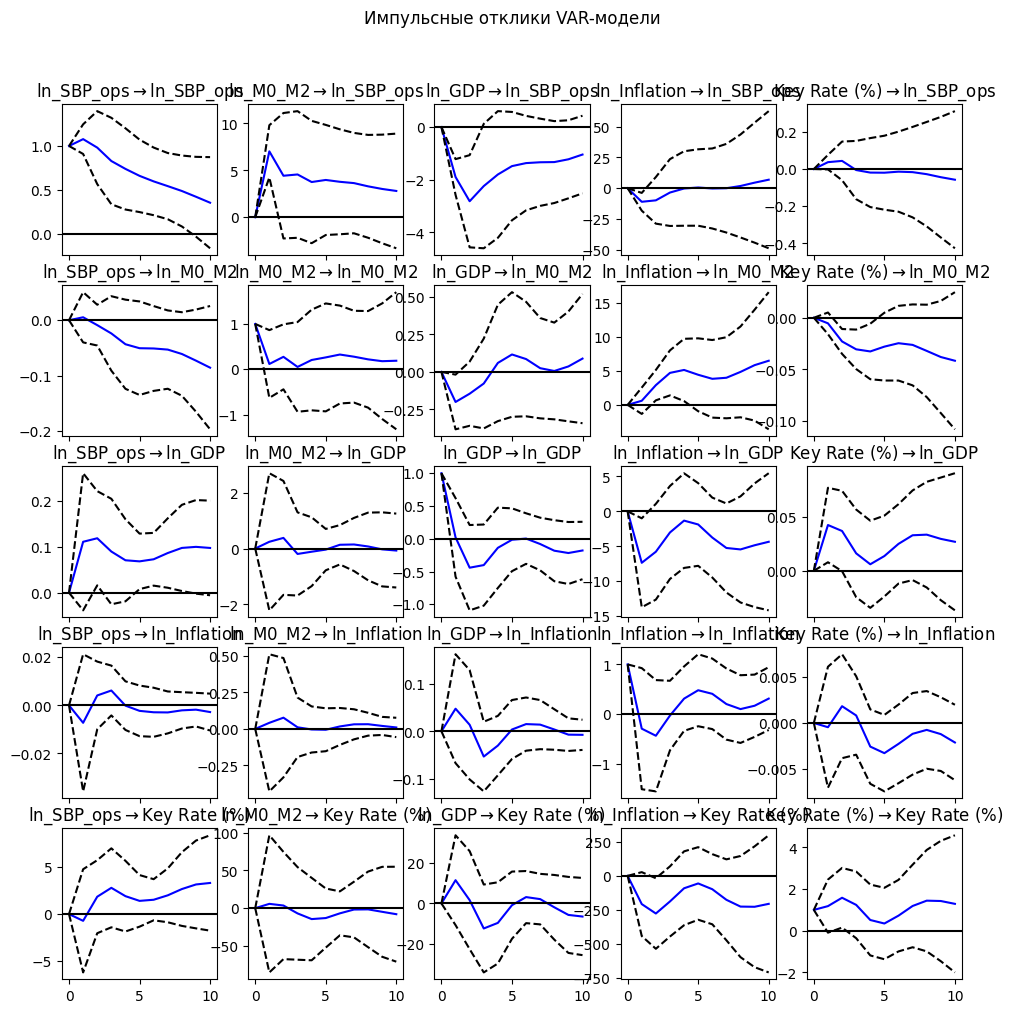

In [53]:
#строим графики импульсных откликов на 10 периодов вперед
irf = var_results.irf(10)
irf.plot(orth=False)
plt.suptitle("Импульсные отклики VAR-модели", y=1.02)
plt.show()

## Седьмой шаг

In [55]:
forecast_steps = 4  # число кварталов для прогнозирования
last_obs = var_data.values[-var_results.k_ar:]  # используем последние наблюдения для инициализации прогноза

#выполняем прогноз VAR-моделью
forecast = var_results.forecast(last_obs, steps=forecast_steps)

#создаем DataFrame для прогнозных значений с соответствующими названиями переменных
forecast_index = range(len(var_data), len(var_data) + forecast_steps)
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=var_data.columns)

In [56]:
forecast_df

,ln_SBP_ops,ln_M0_M2,ln_GDP,ln_Inflation,Key Rate (%)
23,8.254307,-1.883180,10.952175,4.598445,20.237041
24,8.360496,-1.965447,11.013367,4.606688,24.122892
25,8.289816,-2.037935,11.028397,4.605496,26.391759
26,8.270325,-2.114121,11.054278,4.594372,26.996092


Построим доверительный интервал

Предполагаем, что:
var_results – оцененная VAR-модель,
var_data – DataFrame с переменными VAR-модели: 
   "ln_SBP_ops", "ln_M0_M2", "ln_GDP", "ln_Inflation", "Key Rate (%)"
forecast_steps – число прогнозируемых периодов (например, 4 квартала)

In [59]:
forecast_steps = 4
last_obs = var_data.values[-var_results.k_ar:]  #последние наблюдения для инициализации прогноза

#получаем прогноз и доверительные интервалы (alpha=0.05, то есть 95% CI)
forecast, lower, upper = var_results.forecast_interval(last_obs, steps=forecast_steps, alpha=0.05)

In [60]:
#преобразуем прогнозы в DataFrame (пока с числовым индексом)
forecast_df = pd.DataFrame(forecast, index=range(len(var_data), len(var_data) + forecast_steps), columns=var_data.columns)
lower_df = pd.DataFrame(lower, index=range(len(var_data), len(var_data) + forecast_steps), columns=var_data.columns)
upper_df = pd.DataFrame(upper, index=range(len(var_data), len(var_data) + forecast_steps), columns=var_data.columns)

In [61]:
#преобразуем логарифмированные данные обратно в оригинальный масштаб для переменных, начинающихся с "ln_"
def transform_to_original(df_):
    df_trans = df_.copy()
    for col in df_trans.columns:
        if col.startswith("ln_"):
            df_trans[col] = np.exp(df_trans[col])
    return df_trans

forecast_orig = transform_to_original(forecast_df)
lower_orig = transform_to_original(lower_df)
upper_orig = transform_to_original(upper_df)

#для исторических данных тоже создадим версию в оригинальном масштабе:
hist_data = var_data.copy()
for col in hist_data.columns:
    if col.startswith("ln_"):
        hist_data[col] = np.exp(hist_data[col])

Создадим пользовательские метки для оси X: год и квартал

In [63]:
#используем данные из исходного DataFrame df, который содержит столбцы "Год" и "Квартал".
#исторические метки:
hist_labels = df['Год'].astype(str) + " Q" + df['Квартал'].astype(str)
hist_data.index = hist_labels  # присваиваем метки историческим данным

In [64]:
#определяем метки для прогнозных периодов.
#предполагаем, что последний наблюдаемый период в df – это последний квартал, и для прогнозов будем увеличивать квартал.
last_year = int(df['Год'].iloc[-1])
last_quarter = int(df['Квартал'].iloc[-1])
forecast_labels = []
year = last_year
quarter = last_quarter
for i in range(1, forecast_steps+1):
    quarter += 1
    if quarter > 4:
        quarter = 1
        year += 1
    forecast_labels.append(f"{year} Q{quarter}")

In [65]:
#присваиваем прогнозным данным новые метки
forecast_orig.index = forecast_labels
lower_orig.index = forecast_labels
upper_orig.index = forecast_labels

In [66]:
#создаем объединённую таблицу с прогнозными значениями и доверительными интервалами
forecast_table = pd.DataFrame(index=forecast_labels)
for var in forecast_orig.columns:
    forecast_table[f"{var} forecast"] = forecast_orig[var]
    forecast_table[f"{var} lower"] = lower_orig[var]
    forecast_table[f"{var} upper"] = upper_orig[var]
forecast_table

,ln_SBP_ops forecast,ln_SBP_ops lower,ln_SBP_ops upper,ln_M0_M2 forecast,ln_M0_M2 lower,ln_M0_M2 upper,ln_GDP forecast,ln_GDP lower,ln_GDP upper,ln_Inflation forecast,ln_Inflation lower,ln_Inflation upper,Key Rate (%) forecast,Key Rate (%) lower,Key Rate (%) upper
2024 Q4,3844.147832,3137.191508,4710.414560,0.152106,0.144033,0.160631,57078.040619,47697.905743,68302.846219,99.329727,95.976388,102.800229,20.237041,13.611294,26.862788
2025 Q1,4274.815052,2509.801777,7281.070518,0.140093,0.130877,0.149958,60679.876098,49207.085430,74827.584912,100.151863,96.485979,103.957029,24.122892,16.353161,31.892623
2025 Q2,3983.099891,1860.134015,8529.000926,0.130297,0.117588,0.144380,61598.764252,48339.369645,78495.184883,100.032537,96.317714,103.890634,26.391759,17.531748,35.251771
2025 Q3,3906.217083,1596.895837,9555.120346,0.120739,0.105494,0.138188,63213.826579,49034.230404,81493.842931,98.925960,95.116099,102.888425,26.996092,17.355081,36.637103


## Шаг восьмой

Построение графиков: для каждого показателя покажем исторические данные, прогноз и доверительный интервал

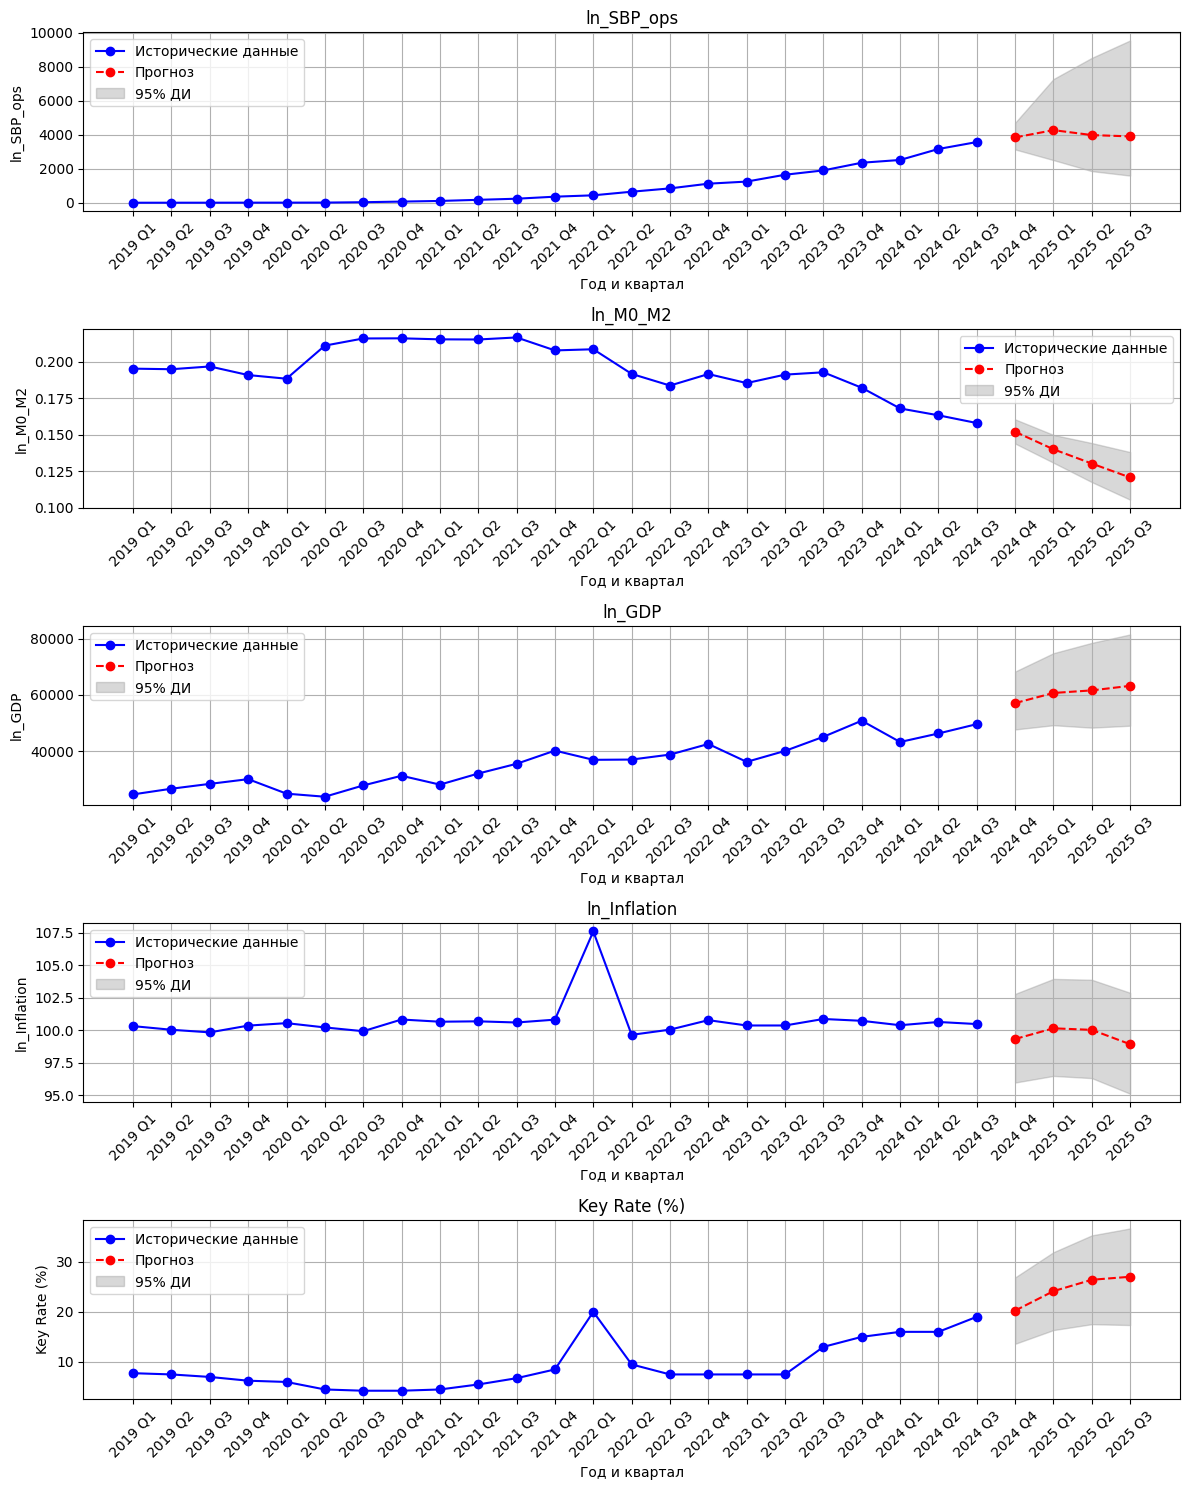

In [69]:
variables = forecast_orig.columns  # список переменных (например, ln_SBP_ops, ln_M0_M2, ln_GDP, ln_Inflation, Key Rate (%))
num_vars = len(variables)
plt.figure(figsize=(12, 3*num_vars))

for i, var in enumerate(variables):
    plt.subplot(num_vars, 1, i+1)
    # Исторические данные (синий цвет, сплошная линия, с метками)
    plt.plot(hist_data.index, hist_data[var], label="Исторические данные", color='blue', marker='o')
    # Прогнозные данные (красная пунктирная линия)
    plt.plot(forecast_orig.index, forecast_orig[var], label="Прогноз", color='red', linestyle='--', marker='o')
    # Доверительный интервал (заштрихованная область)
    plt.fill_between(forecast_orig.index, lower_orig[var], upper_orig[var], color='gray', alpha=0.3, label="95% ДИ")
    plt.title(var)
    plt.xlabel("Год и квартал")
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    
plt.tight_layout()
plt.show()

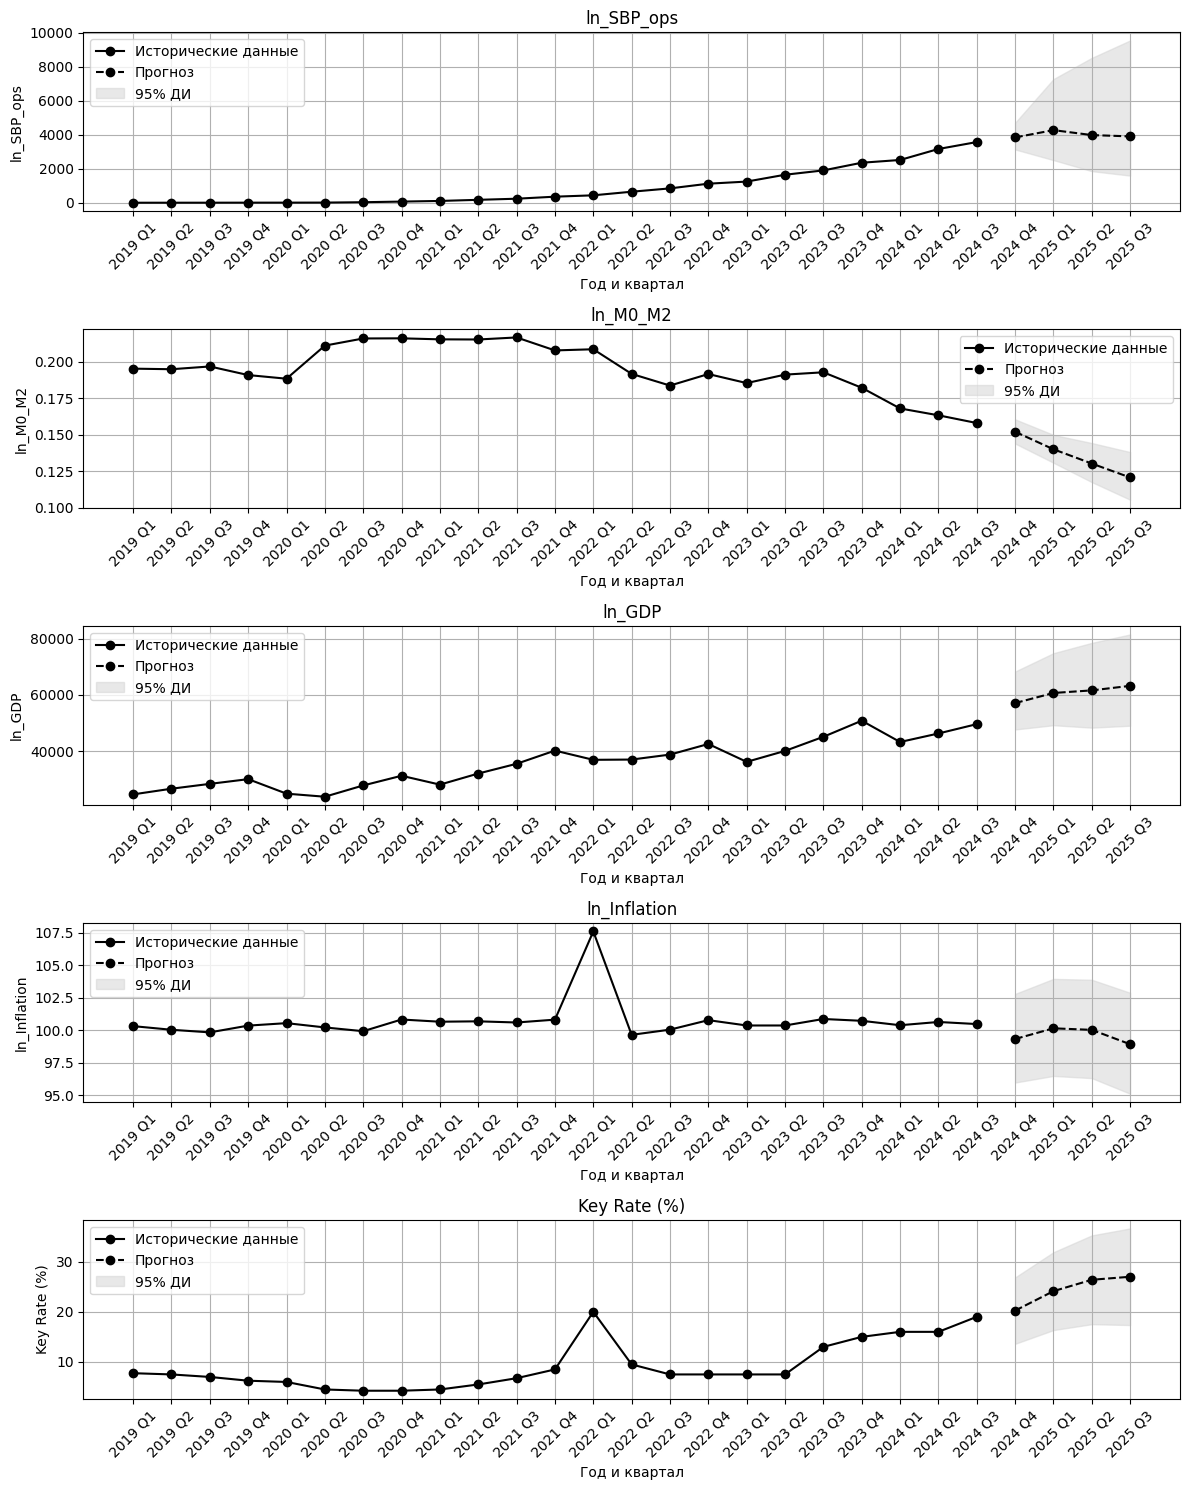

In [70]:
variables = forecast_orig.columns  # список переменных
num_vars = len(variables)
plt.figure(figsize=(12, 3*num_vars))

for i, var in enumerate(variables):
    plt.subplot(num_vars, 1, i+1)
    #исторические данные – сплошная черная линия с маркерами
    plt.plot(hist_data.index, hist_data[var], label="Исторические данные", color='black', marker='o')
    #прогноз – пунктирная черная линия с маркерами
    plt.plot(forecast_orig.index, forecast_orig[var], label="Прогноз", color='black', linestyle='--', marker='o')
    #доверительный интервал – немного сероватая заливка
    plt.fill_between(forecast_orig.index, lower_orig[var], upper_orig[var], color='lightgray', alpha=0.5, label="95% ДИ")
    plt.title(var)
    plt.xlabel("Год и квартал")
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    
plt.tight_layout()
plt.show()

Был выполнен прогноз на четыре квартала вперёд, основанный на итоговой VAR-модели и последних доступных наблюдениях, с целью оценить дальнейшую динамику числа операций в СБП, структуры денежной массы (M0/M2), ВВП, инфляции и ключевой ставки. Чтобы интерпретировать результаты в исходных единицах, логарифмированные переменные (начинающиеся с «ln_») были преобразованы обратно путём экспоненцирования.

В таблице с прогнозными значениями заметно, что прогнозируемое количество операций в СБП (столбец ln_SBP_ops forecast) по-прежнему достаточно высоко, хотя и не демонстрирует дальнейшего устойчивого роста с учётом доверительных интервалов: значения колеблются от примерно 3900 до 4300 млн транзакций на квартал с очень широким диапазоном неопределённости. Показатель M0/M2 (около 0.15 в 2024 Q4 и снижается до ~0.12 к 2025 Q3) указывает на возможное продолжение тренда снижения доли наличной денежной массы в структуре M2. Прогноз для ВВП (57–63 тыс. млрд руб. в ценах выборки) отражает предполагаемую умеренно растущую траекторию, однако интервалы верхней и нижней границ тоже достаточно велики. Инфляция (в интерпретации индекс ИПЦ) колеблется в диапазоне около 99–100, что может говорить о близкой к нулю или негативной динамике цен за рассматриваемые кварталы, хотя широкий доверительный интервал оставляет много неопределённости. Ключевая ставка с исходного уровня ~20% растёт в прогнозе до ~27% к 2025 Q3, что согласуется с модельным предположением о сохранении жёсткой монетарной политики.

Четырёхквартальный горизонт прогноза даёт лишь условное представление о будущей динамике, и в условиях ограниченного числа наблюдений доверительные интервалы выходят довольно широкими. Кроме того, недоступность более детальных (ежемесячных) данных по ряду индикаторов ЦБ не позволяет повысить частоту и объём выборки, а значит и точность оценок. Прогноз следует трактовать скорее как возможный сценарий на базе исторических взаимосвязей, учтённых в VAR-модели, и он может существенно корректироваться, если экономика столкнётся с шоками или же сама структура денежно-кредитной статистики изменится более резко, чем предполагалось на основе прошлых данных.